# Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
url = [] 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        url.append(os.path.join(dirname, filename))
        
print(url)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte', '/kaggle/input/fashionmnist/train-labels-idx1-ubyte', '/kaggle/input/fashionmnist/fashion-mnist_test.csv', '/kaggle/input/fashionmnist/train-images-idx3-ubyte', '/kaggle/input/fashionmnist/t10k-images-idx3-ubyte', '/kaggle/input/fashionmnist/fashion-mnist_train.csv']


# *Read data*

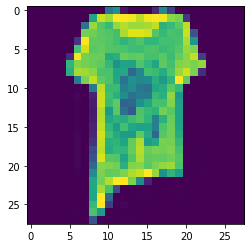

In [2]:
train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

train_label = train['label']
test_label =  test['label']
disp = train.iloc[5000].values[1:]
plt.imshow(disp.reshape((28,28)))




# Prepare Data 
prepare data to fit model 


In [3]:
X = train.copy()
X_test = test.copy()
X_train = (X.drop('label',axis =1)).to_numpy()
X_test = (X_test.drop('label',axis = 1)).to_numpy()

y_train_label = train_label.to_numpy()
y_test_label= test_label.to_numpy()

X_train = X_train/255
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)
X_test.shape

(10000, 28, 28, 1)

# Build Model 
this is our model 

In [4]:
def build_model(hp):

    model = keras.Sequential([
        keras.layers.Conv2D(
                            filters = hp.Int('layer_1_filter',min_value=32, max_value=128,step= 16),
                            kernel_size = hp.Choice('layer_1_kernel',values = [3,4]),
                            activation = 'relu',
                            input_shape = (28,28,1)                            
                            ),
        keras.layers.Conv2D(
                            filters = hp.Int('layer_2_filter',min_value=32, max_value=128,step= 16),
                            kernel_size = hp.Choice('layer_2_kernel',values = [3,4]),
                            activation = 'relu'                          
                            ),
        keras.layers.Flatten(),
        keras.layers.Dense(
                            units = hp.Int('dense_unit_1',min_value=32,max_value=128,step = 16),
                            activation = 'relu'
                          ),
        
        keras.layers.Dense(10,activation = 'softmax')
       ])
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning-rate',values=[1e-2, 1e-3])),
                                                  loss ='sparse_categorical_crossentropy',metrics=['accuracy']) 
    
    return model

# Searching for best model
In this we are searching for best model with best perems  

In [5]:
tunersearch = RandomSearch(build_model,objective = 'val_accuracy',max_trials = 5, directory = 'output',project_name = 'Optimize model')
tunersearch.search(X_train,y_train_label,epochs =3  ,validation_split=0.1)
model=tunersearch.get_best_models(num_models=1)[0]
model.summary()


Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3819 - accuracy: 0.8638 - val_loss: 0.2836 - val_accuracy: 0.9002
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2349 - accuracy: 0.9141 - val_loss: 0.2501 - val_accuracy: 0.9090
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1701 - accuracy: 0.9372 - val_loss: 0.2317 - val_accuracy: 0.9205


Epoch 1/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4661 - accuracy: 0.8389 - val_loss: 0.3518 - val_accuracy: 0.8727
Epoch 2/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3224 - accuracy: 0.8835 - val_loss: 0.3249 - val_accuracy: 0.8855
Epoch 3/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2742 - accuracy: 0.8992 - val_loss: 0.3285 - val_accuracy: 0.8877


Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4062 - accuracy: 0.8524 - val_loss: 0.2986 - val_accuracy: 0.8908
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2622 - accuracy: 0.9042 - val_loss: 0.2736 - val_accuracy: 0.8998
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2042 - accuracy: 0.9250 - val_loss: 0.2649 - val_accuracy: 0.9057


Epoch 1/3
1688/1688 [==============================] - 9s 6ms/step - loss: 0.5206 - accuracy: 0.8182 - val_loss: 0.4208 - val_accuracy: 0.8423
Epoch 2/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3897 - accuracy: 0.8551 - val_loss: 0.3895 - val_accuracy: 0.8537
Epoch 3/3


# Trained Model


In [6]:
model.fit(X_train,y_train_label, epochs=20, validation_split=0.1, initial_epoch=3)

Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1196 - accuracy: 0.9564 - val_loss: 0.2521 - val_accuracy: 0.9173
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0787 - accuracy: 0.9715 - val_loss: 0.2861 - val_accuracy: 0.9120
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0533 - accuracy: 0.9803 - val_loss: 0.3531 - val_accuracy: 0.9142
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0381 - accuracy: 0.9864 - val_loss: 0.3492 - val_accuracy: 0.9167
Epoch 8/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0294 - accuracy: 0.9893 - val_loss: 0.4557 - val_accuracy: 0.9105
Epoch 9/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0222 - accuracy: 0.9919 - val_loss: 0.5229 - val_accuracy: 0.9073
Epoch 10/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9929 - val_loss: 0.5743 - val_accuracy

# Evaluate Model
Evaluate model with test data

In [7]:

test_loss, test_acc = model.evaluate(X_test,y_test_label, verbose=2)
print ('test acc - ',test_acc)

313/313 - 1s - loss: 301.4277 - accuracy: 0.8433
test acc -  0.8432999849319458
